<center>
    
# Milestone for Weeks 7 & 8

</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 540 <br>
5/1/2024  

</div>


## Cleaning/Formatting Website Data
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

   - ### Libraries

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

   - ### Theater Locations

In [2]:
zip_code_list = [
    '97503', '36608', '78744', '78229', '93536', '72019', '75149', '00000', '75093', '40509',
    '77840', '75067', '47130', '21046', '89103', '75093', '76116', '84119', '25504', '00000',
    '78332', '77040', '76011', '75032', '75093'
]

   - ### Web scraping

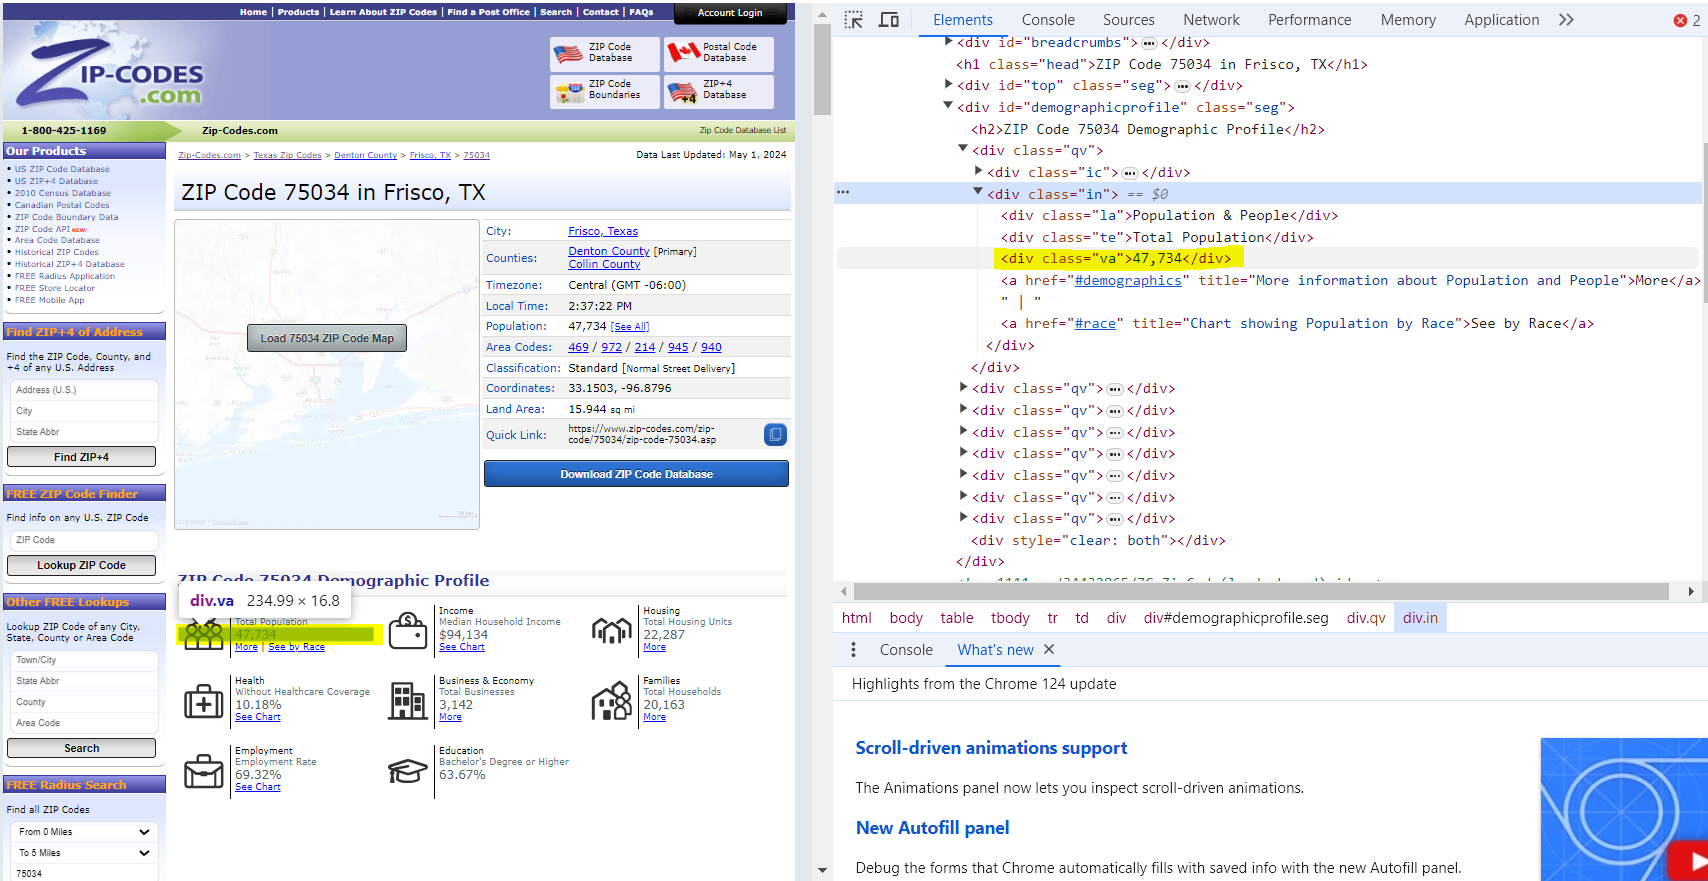

The object will store the results in the empty list.

In [3]:
scraped_data = []

This function uses the zip code and places them into the url / web address. Then will scrape the targeted values.

In [4]:
for zip_code in zip_code_list:
    url = f"https://www.zip-codes.com/zip-code/{zip_code}/zip-code-{zip_code}.asp"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        divs = soup.find_all('div', class_='va')
        values = [div.text.strip() for div in divs]
        zip_code_data = {'ZipCode': zip_code}  # Create a dictionary to store the data for this zip code
        categories = ['Population', 'Income', 'Housing', 'Health', 'Business', 'Families', 'Employment', 'Education']
        for category, value in zip(categories, values):
            zip_code_data[category] = value
        scraped_data.append(zip_code_data) # Append the dictionary to the data list
    else:
        print(f"Failed to retrieve data for zip code {zip_code}")

   - ### Data

In [5]:
# Converts list of dictionaries to a DataFrame
data = pd.DataFrame(scraped_data)
print(data.head())

  ZipCode Population   Income Housing  Health Business Families Employment  \
0   97503     12,349  $58,964   4,217   5.74%      284    4,054     53.88%   
1   36608     39,782  $53,217  17,805   8.77%    1,185   16,129     58.75%   
2   78744     51,048  $65,262  18,583  20.54%      877   17,702     73.94%   
3   78229     33,135  $41,128  18,496  18.41%    1,245   15,984     66.01%   
4   93536     74,283  $89,987  24,269   3.28%      684   23,431     51.63%   

  Education  
0    14.61%  
1    40.33%  
2    25.77%  
3    34.09%  
4    24.81%  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZipCode     25 non-null     object
 1   Population  25 non-null     object
 2   Income      25 non-null     object
 3   Housing     25 non-null     object
 4   Health      25 non-null     object
 5   Business    25 non-null     object
 6   Families    25 non-null     object
 7   Employment  25 non-null     object
 8   Education   25 non-null     object
dtypes: object(9)
memory usage: 1.9+ KB
None


   - ### Step 1 - Remove Special Characters

Description - I want ot clean the numbers so that when I format them I will not get an error.

In [7]:
data.replace({',': '', '-': '', '%': '', '$': ''}, regex=True, inplace=True)
print(data.head())

  ZipCode Population  Income Housing Health Business Families Employment  \
0   97503      12349  $58964    4217   5.74      284     4054      53.88   
1   36608      39782  $53217   17805   8.77     1185    16129      58.75   
2   78744      51048  $65262   18583  20.54      877    17702      73.94   
3   78229      33135  $41128   18496  18.41     1245    15984      66.01   
4   93536      74283  $89987   24269   3.28      684    23431      51.63   

  Education  
0     14.61  
1     40.33  
2     25.77  
3     34.09  
4     24.81  


   - ### Step 2 - Fill with 0

Description - I want to standardise the empty/blank/outliers with 0. This will help easily remove the no value rows.

In [8]:
data = data.fillna(0)
data = data.replace({'': 0, '1': 0})
print(data.head())

  ZipCode Population  Income Housing Health Business Families Employment  \
0   97503      12349  $58964    4217   5.74      284     4054      53.88   
1   36608      39782  $53217   17805   8.77     1185    16129      58.75   
2   78744      51048  $65262   18583  20.54      877    17702      73.94   
3   78229      33135  $41128   18496  18.41     1245    15984      66.01   
4   93536      74283  $89987   24269   3.28      684    23431      51.63   

  Education  
0     14.61  
1     40.33  
2     25.77  
3     34.09  
4     24.81  


   - ### Step 3 - Format Columns

Description - Format the data types to be what the values were intended to be.

In [9]:
# Convert to integers
data['ZipCode'] = data['ZipCode'].astype(int)
data['Population'] = data['Population'].astype(int)
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(int)
data['Housing'] = data['Housing'].astype(int)
data['Business'] = data['Business'].astype(int)
data['Families'] = data['Families'].astype(int)

# Format Health and Employment as percentages
data['Health'] = data['Health'].str.rstrip('%').astype(float) / 100
data['Employment'] = data['Employment'].str.rstrip('%').astype(float) / 100

print(data.head())

   ZipCode  Population  Income  Housing  Health  Business  Families  \
0    97503       12349   58964     4217  0.0574       284      4054   
1    36608       39782   53217    17805  0.0877      1185     16129   
2    78744       51048   65262    18583  0.2054       877     17702   
3    78229       33135   41128    18496  0.1841      1245     15984   
4    93536       74283   89987    24269  0.0328       684     23431   

   Employment Education  
0      0.5388     14.61  
1      0.5875     40.33  
2      0.7394     25.77  
3      0.6601     34.09  
4      0.5163     24.81  


   - ### Step 4 - Remove rows

Description - remove the rows that contain no useful infomation. Remove the all 0 / nan rows.

In [11]:
data = data.dropna(how='all')
data = data.loc[~(data==0).all(axis=1)]
print(data.head())

   ZipCode  Population  Income  Housing  Health  Business  Families  \
0    97503       12349   58964     4217  0.0574       284      4054   
1    36608       39782   53217    17805  0.0877      1185     16129   
2    78744       51048   65262    18583  0.2054       877     17702   
3    78229       33135   41128    18496  0.1841      1245     15984   
4    93536       74283   89987    24269  0.0328       684     23431   

   Employment Education  
0      0.5388     14.61  
1      0.5875     40.33  
2      0.7394     25.77  
3      0.6601     34.09  
4      0.5163     24.81  


   - ### Step 5 - Rename Columns

Description - Rename columns following a consistent naming convention.

In [12]:
data.rename(columns={
    'ZipCode': 'zip_code',
    'Population': 'population',
    'Income': 'income',
    'Housing': 'housing',
    'Health': 'health',
    'Business': 'business_count',
    'Families': 'family_count',
    'Employment': 'employment',
    'Education': 'education'
}, inplace=True)

In [13]:
data.fillna(0, inplace=True)

In [14]:
print(data.head())

   zip_code  population  income  housing  health  business_count  \
0     97503       12349   58964     4217  0.0574             284   
1     36608       39782   53217    17805  0.0877            1185   
2     78744       51048   65262    18583  0.2054             877   
3     78229       33135   41128    18496  0.1841            1245   
4     93536       74283   89987    24269  0.0328             684   

   family_count  employment education  
0          4054      0.5388     14.61  
1         16129      0.5875     40.33  
2         17702      0.7394     25.77  
3         15984      0.6601     34.09  
4         23431      0.5163     24.81  


   - ### Ethical Implications

What changes were made to the data?

Filling missing values with 0.
Removing rows with all 0 values or NaN values.
Renaming columns to follow a consistent naming convention.
Converting certain columns to integer type.
Form specifatting percentages inic columns.
Replacing special characters in certain columns.

<br><br>

Are there any legal or regulatory guidelines for your data or project topic?

There may be licensing agreements or terms of service that could of been violated.

<br><br>
What risks could be created based on the transformations done?

loss of information or introduction of errors during cleaning or formatting.
<br><br>

Did you make any assumptions in cleaning/transforming the data?

Assuming that missing values in certain columns can be safely filled with 0.

<br><br>
How was your data sourced / verified for credibility?

No, This was one website and I noticed some of the answers being off. I know the population in Frisco is much higher than stated.

<br><br>
Was your data acquired in an ethical way?

If there was violations of the terms and conditions it would be unfriendly but what I can gain from my eyes I should be able to do so with code without raising flags.

<br><br>
How would you mitigate any of the ethical implications you have identified?

Transparency in data processing and documentation of data sources and methodologies.